In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the XLSX file
df = pd.read_excel('/content/drive/MyDrive/DB Sys/EV/Datasets/Electric_Vehicle_Registration.xlsx', header=1)
df

,State,Electric,Hybrid_Electric,Ethanol,CNG,Propane,Hydrogen,Methanol,Diesel,Year
0,Alaska,1300,7300,50100,100,0,0,0,31700,2021
1,Arkansas,2400,26100,290200,300,0,0,0,88800,2021
2,Connecticut,13300,55400,140700,400,0,0,0,44300,2021
3,Delaware,3000,16700,67400,100,0,0,0,14600,2021
4,District of Columbia,3700,16100,17400,100,0,0,0,2100,2021
...,...,...,...,...,...,...,...,...,...,...
351,California,349700,1154200,1698700,76200,0,12700,300,785800,2019
352,Arizona,7200,96000,484600,16600,0,0,100,187500,2017
353,Arizona,4700,89600,427300,17500,0,0,100,179500,2016
354,California,189700,1039300,1495800,79300,0,3200,400,738600,2017


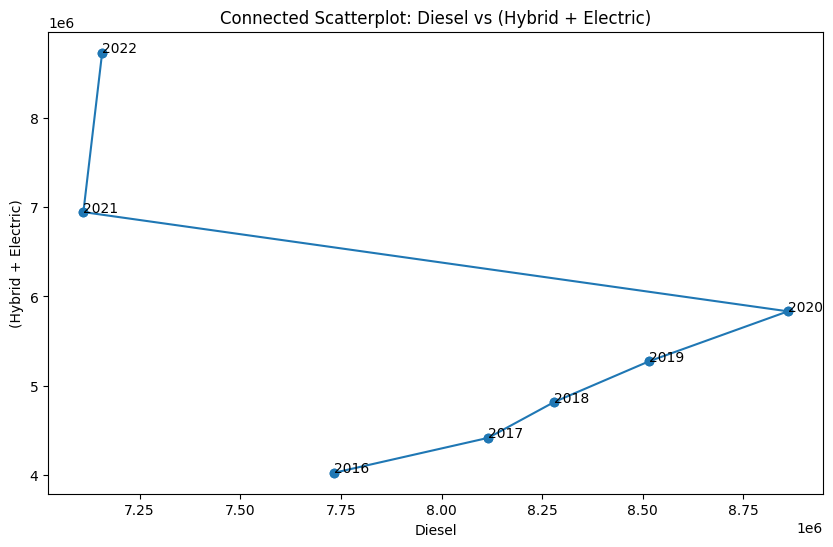

In [6]:

# Aggregate the data by year
grouped = df.groupby('Year')[['Diesel', 'Hybrid_Electric', 'Electric']].sum().reset_index()

# Calculate the (Hybrid + Electric) column
grouped['(Hybrid + Electric)'] = grouped['Hybrid_Electric'] + grouped['Electric']

# Create the connected scatterplot graph
plt.figure(figsize=(10, 6))
plt.scatter(grouped['Diesel'], grouped['(Hybrid + Electric)'])
for i, txt in enumerate(grouped['Year']):
    plt.annotate(txt, (grouped['Diesel'].iloc[i], grouped['(Hybrid + Electric)'].iloc[i]))
plt.plot(grouped['Diesel'], grouped['(Hybrid + Electric)'], marker='o', linestyle='-')
plt.xlabel('Diesel')
plt.ylabel('(Hybrid + Electric)')
plt.title('Connected Scatterplot: Diesel vs (Hybrid + Electric)')
plt.show()

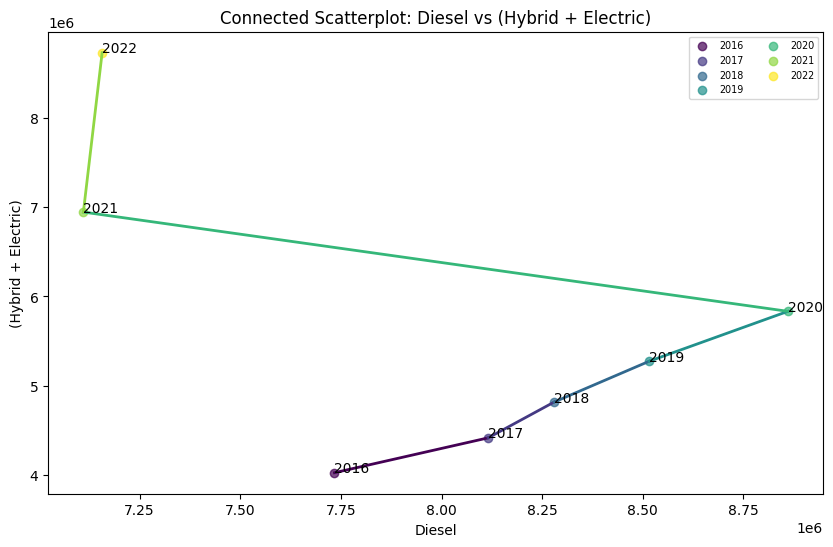

In [12]:
# Aggregate the data by year
grouped = df.groupby('Year')[['Diesel', 'Hybrid_Electric', 'Electric']].sum().reset_index()

# Calculate the (Hybrid + Electric) column
grouped['(Hybrid + Electric)'] = grouped['Hybrid_Electric'] + grouped['Electric']

# Create the connected scatterplot graph
plt.figure(figsize=(10, 6))

# Set the color map to get a gradient for the line
cmap = plt.get_cmap('viridis')
colors = [cmap(i) for i in np.linspace(0, 1, len(grouped))]

# Plot the scatter points
for i, txt in enumerate(grouped['Year']):
    plt.scatter(grouped['Diesel'].iloc[i], grouped['(Hybrid + Electric)'].iloc[i], color=colors[i], alpha=0.7, label=txt)
    plt.annotate(txt, (grouped['Diesel'].iloc[i], grouped['(Hybrid + Electric)'].iloc[i]))

# Plot the connected lines with a gradient
for i in range(1, len(grouped)):
    plt.plot([grouped['Diesel'].iloc[i-1], grouped['Diesel'].iloc[i]],
             [grouped['(Hybrid + Electric)'].iloc[i-1], grouped['(Hybrid + Electric)'].iloc[i]],
             color=colors[i-1], linestyle='-', linewidth=2)

plt.xlabel('Diesel')
plt.ylabel('(Hybrid + Electric)')
plt.title('Connected Scatterplot: Diesel vs (Hybrid + Electric)')
plt.legend(loc='upper right', ncol=2, fontsize='x-small')
plt.show()